In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [34]:
from keras.datasets import mnist

In [35]:
from keras.models import Sequential #Open a new nueral network
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [36]:
from keras.utils import np_utils

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [39]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [40]:
y_train = np_utils.to_categorical(y_train, 10) #one hot encoding
y_test = np_utils.to_categorical(y_test, 10)

Model Usage

In [41]:
from keras.models import Model
from keras.layers import Input

%example

In [42]:
f_1 = Dense(500, activation = 'sigmoid')   #combnation notation
f_2 = Dense(500, activation = 'sigmoid')   #Dense("Co-domain", Act.)
f_3 = Dense(10, activation = 'softmax')

In [43]:
print(f_1)

In [44]:
x = Input(shape=(784, ))

In [45]:
print(x)

Tensor("input_4:0", shape=(?, 784), dtype=float32)


Mathematical notation mentioned in the video

In [46]:
h_1 = f_1(x)  #seem it as single variable fn.
h_2 = f_2(h_1)
y = f_3(h_2)

In [47]:
print(h_1)
print(h_2)
print(y)

Tensor("dense_1/Sigmoid:0", shape=(?, 500), dtype=float32)
Tensor("dense_2/Sigmoid:0", shape=(?, 500), dtype=float32)
Tensor("dense_3/Softmax:0", shape=(?, 10), dtype=float32)


model(in, out)

In [48]:
model = Model(x, y) #model(in, out)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss = 'mse', optimizer=SGD(lr = 0.1), metrics = ['accuracy'])

In [50]:
model.fit(x_train, y_train, batch_size = 100, epochs = 7)


Epoch 1/7
60000/60000 [==============================] - 7s 122us/step - loss: 0.0827 - accuracy: 0.3737
Epoch 2/7
60000/60000 [==============================] - 7s 124us/step - loss: 0.0619 - accuracy: 0.6363
Epoch 3/7
60000/60000 [==============================] - 7s 121us/step - loss: 0.0441 - accuracy: 0.7712
Epoch 4/7
60000/60000 [==============================] - 7s 121us/step - loss: 0.0324 - accuracy: 0.8415
Epoch 5/7
60000/60000 [==============================] - 7s 109us/step - loss: 0.0253 - accuracy: 0.8754
Epoch 6/7
60000/60000 [==============================] - 7s 118us/step - loss: 0.0211 - accuracy: 0.8892
Epoch 7/7
60000/60000 [==============================] - 7s 119us/step - loss: 0.0185 - accuracy: 0.8992


In [51]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/step


[0.017221306396275757, 0.9038000106811523]

Non-linear

In [52]:
from keras.layers import concatenate, add

In [53]:
f_4 = Dense(500, activation = 'relu')
z = f_4(h_1)

#new f_3
f_3 = Dense(10, activation = 'softmax')

In [54]:
u = concatenate([h_2, z]) #preprocessing of multiple variables
y = f_3(u) #By the line above, using functional input

In [55]:
print(u)
print(y)

Tensor("concatenate_1/concat:0", shape=(?, 1000), dtype=float32)
Tensor("dense_5/Softmax:0", shape=(?, 10), dtype=float32)


In [56]:
model = Model(x, y)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_4[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          250500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 500)          250500      dense_1[0][0]                    
____________________________________________________________________________________________

Non-weighted Neural Network

In [57]:
from keras.layers.core import Lambda
from keras import backend as K

In [63]:
def AVG(inputs) :
   return K.mean(inputs, axis=1)

In [64]:
average_layer = Lambda(AVG)

In [65]:
print(average_layer)

In [66]:
inputSize = 4

x = Input(shape = (inputSize,))
y = average_layer(x)
average_model = Model(x, y)

In [67]:
average_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
lambda_7 (Lambda)            (None,)                   0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [68]:
average_model.compile(loss = 'mse', optimizer = 'sgd')

In [73]:
V = np.array([[1, 2, 3, 4]])

In [74]:
V.shape   # An 4-dim vector

(1, 4)

In [75]:
average_model.predict(V)

array([2.5], dtype=float32)

In [77]:
average_model.predict(np.array([[1,2,3,4], [1,1,1,1]]))

array([2.5, 1. ], dtype=float32)

Sampling

In [78]:
sampling_dim = 2

def sampling(args) :
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(sampling_dim,), mean = 0, stddev = 1)  #normal distr. setting
    return z_mean + K.exp(z_log_var / 2)*epsilon

In [80]:
sampling_layer = Lambda(sampling, output_shape = (sampling_dim, ))

In [81]:
m = Input(shape=(sampling_dim, ))
s = Input(shape=(sampling_dim, ))

z = sampling_layer([m, s])

sampling_model = Model([m, s], z)

In [82]:
sampling_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
lambda_8 (Lambda)               (None, 2)            0           input_8[0][0]                    
                                                                 input_9[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [85]:
test_mean = np.random.randint(10, size = sampling_dim).reshape(1, 2)
test_log_var = np.array([[0, 0]])

print("Mean = (", test_mean[0][0], " , ", test_mean[0][1], ")")

Mean = ( 2  ,  8 )


In [88]:
sampling_model.predict([test_mean, test_log_var])

array([[2.1464705, 8.467049 ]], dtype=float32)

In [89]:
num_of_sampling = 100

In [90]:
np_sample = np.random.multivariate_normal(test_mean[0], np.identity(2), size = num_of_sampling)

In [92]:
keras_sample = np.zeros((num_of_sampling, 2))
for i in range(num_of_sampling) :
    keras_sample[i] = sampling_model.predict([test_mean, test_log_var])

Text(0.5, 1.0, 'Difference of Normal Distr. between Keras and Numpy')

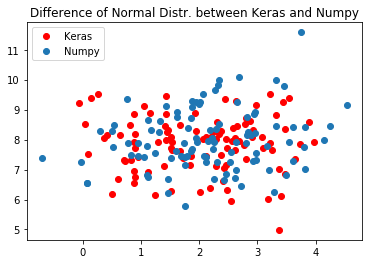

In [94]:
plt.plot(keras_sample[:, 0], keras_sample[:, 1], 'ro')
plt.plot(np_sample[:, 0], np_sample[:, 1], 'o')
plt.legend(['Keras', 'Numpy'])
plt.title('Difference of Normal Distr. between Keras and Numpy')